In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import os
import glob
from tensorflow.keras.layers import Dense , BatchNormalization, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Initializing Parameters

In [19]:
Image_dimensions=(96,96,3)# width, height, depth 
lr=1e-3
batch_size=64
epochs=10

Images_data=[]
labels_data=[]

# Load_Dataset 

In [20]:
Images_Dataset=[f for f in glob.glob (r'C:\\Users\\Dell\\Downloads\\Gender-Detection-master1\\Gender-Detection-master\\gender_dataset_face' +
                                     '//**//*',recursive=True) if not os.path.isdir(f)]

In [21]:
random.shuffle(Images_Dataset)

# Convert Images to array and labels to categories

In [22]:
for all_images in Images_Dataset:
    Images=cv2.imread(all_images)
    Images=cv2.resize(Images, (Image_dimensions[0],Image_dimensions[1]))
    Images=img_to_array(Images)
    
    Images_data.append(Images)
    
    Labels=all_images.split(os.path.sep)[-2]
    if Labels=='woman':
        Labels=0
    else:
        Labels=1
   
    labels_data.append([Labels])

# Images and Labels Preprocessing

In [23]:
Images_data=np.array(Images_data, dtype='float')/255.0
labels_data=np.array(labels_data)

In [24]:
(X_train,X_test,y_train,y_test)=train_test_split(Images_data, labels_data, test_size=0.2, random_state=42)

In [25]:
y_train=to_categorical(y_train, num_classes=2)
y_test=to_categorical(y_test, num_classes=2)

# Data Argumentation

In [26]:
data_argumented=ImageDataGenerator(rotation_range=25, width_shift_range=0.1, height_shift_range=0.1,
                                  shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# Model

In [27]:
def model_building(width, height,rgb_channels, no_of_categories):
    model=Sequential()
    Shape=(width,height,rgb_channels) #for rgb--> channels_last
    channel_dims=-1
    
    if K.image_data_format=='channels_first':
        Shape=(rgb_channels, width, height) # for rgb --> channels_first
        channel_dims=1
    
    model.add(Conv2D(32,(3,3), padding='same',input_shape=Shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dims))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dims))
    
    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dims))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dims))
    
    model.add(Conv2D(128,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=channel_dims))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(BatchNormalization())#<---
    model.add(Dropout(0.5))
    
    model.add(Dense(no_of_categories))
    model.add(Activation('sigmoid'))
    
    return model

In [28]:
model=model_building(Image_dimensions[0],Image_dimensions[1],Image_dimensions[2],no_of_categories=2)

# Compilation 0f Model

In [29]:
optimizer=Adam(lr=lr,decay=lr/epochs)


C:\Vs\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [30]:
model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])

# Training Model

In [35]:
History=model.fit_generator(data_argumented.flow(X_train, y_train, batch_size=batch_size),
                             validation_data=(X_test, y_test), steps_per_epoch=len(X_train)//batch_size,
                             epochs=epochs, verbose=1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8340\3980599366.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History=model.fit_generator(data_argumented.flow(X_train, y_train, batch_size=batch_size),


Epoch 1/10
28/28 [==============================] - 68s 2s/step - loss: 0.4547 - accuracy: 0.8231 - val_loss: 0.7243 - val_accuracy: 0.5130
Epoch 2/10
28/28 [==============================] - 66s 2s/step - loss: 0.3966 - accuracy: 0.8467 - val_loss: 0.6473 - val_accuracy: 0.6364
Epoch 3/10
28/28 [==============================] - 66s 2s/step - loss: 0.3555 - accuracy: 0.8613 - val_loss: 1.6786 - val_accuracy: 0.5195
Epoch 4/10
28/28 [==============================] - 67s 2s/step - loss: 0.3445 - accuracy: 0.8754 - val_loss: 1.9257 - val_accuracy: 0.5195
Epoch 5/10
28/28 [==============================] - 66s 2s/step - loss: 0.2981 - accuracy: 0.8905 - val_loss: 1.9891 - val_accuracy: 0.5195
Epoch 6/10
28/28 [==============================] - 67s 2s/step - loss: 0.2779 - accuracy: 0.8989 - val_loss: 1.3263 - val_accuracy: 0.5260
Epoch 7/10
28/28 [==============================] - 68s 2s/step - loss: 0.2411 - accuracy: 0.9096 - val_loss: 0.6956 - val_accuracy: 0.6277
Epoch 8/10
28/28 [==

In [36]:
model.save("Gender_Detector_System")

INFO:tensorflow:Assets written to: Gender_Detector_System\assets


INFO:tensorflow:Assets written to: Gender_Detector_System\assets


# Plotting

In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(5,5))


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

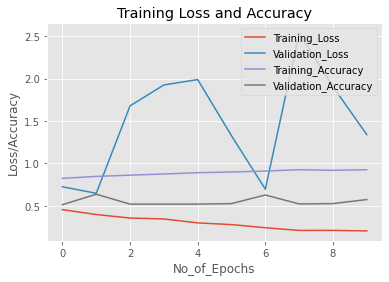

In [38]:
plt.plot(np.arange(0,epochs),History.history['loss'],label='Training_Loss')
plt.plot(np.arange(0,epochs),History.history['val_loss'],label='Validation_Loss')
plt.plot(np.arange(0,epochs),History.history['accuracy'],label='Training_Accuracy')
plt.plot(np.arange(0,epochs),History.history['val_accuracy'],label='Validation_Accuracy')

plt.title("Training Loss and Accuracy")
plt.xlabel('No_of_Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='upper right')
plt.show()

In [39]:
plt.savefig("Gender_Detection_plot")

<Figure size 432x288 with 0 Axes>